**Data Pre-Processing**

In this notebook, I will import and perform a few pre-processing tasks on the given dataset that'll help the construction of the AEs in the next notebook. As mentioned in Eric Wulff's thesis, the custom standardization procedure consisted of only the logarithmic transformation of the E and Pt followed by standardization; this was done in an attempt to normalize the data. I have also opted to use the Gaussian Quantile transformation followed by standardization to achieve the same. In the end, two CSV files will be generated, one the Standard.csv, which contains data with transformations done as mentioned in the original paper, and the two, Rank Gauss.csv, that contains my method of data pre-processing. 

In [ ]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [ ]:
#Attach the monojet_Zp2000.0_DM_50.0_chan3.csv
fname = '/Dataset/monojet_Zp2000.0_DM_50.0_chan3.csv'

In [ ]:
#Importing the dataset
data = []    
with open(fname, 'r') as file:
    for line in file.readlines():
        line = line.replace(';', ',')
        line = line.rstrip(',\n')
        line = line.split(',')
        data.append(line)

In [ ]:
#Set the columns names
col_names = ['event_ID', 'process_ID', 'event_weight', 'MET', 'MET_Phi']
for i in range(12):
        col_names.append('obj'+str(i+1))
        col_names.append('E'+str(i+1))
        col_names.append('pt'+str(i+1))
        col_names.append('eta'+str(i+1))
        col_names.append('phi'+str(i+1))

In [ ]:
df = pd.DataFrame(data, columns=col_names)
df.fillna(value=pd.np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [ ]:
df_5d = df[col_names[5:10]]
df_5d_j = df_5d[df_5d['obj1']=='j']
data_4d_df = df_5d_j.drop(columns='obj1')
data_4d_df = data_4d_df.fillna(0)
data_4d_df = data_4d_df.astype('float32')

In [ ]:
def plot_all(data):
    for key in data.keys():
        plt.figure()
        plt.hist(data[key], bins=100)
        plt.xlabel(str(key))
        plt.ylabel('Number of jets')
        plt.yscale('log')

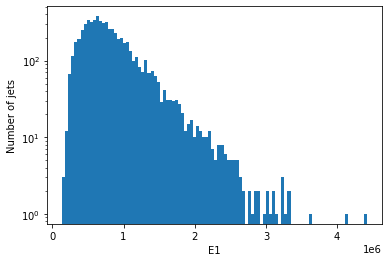

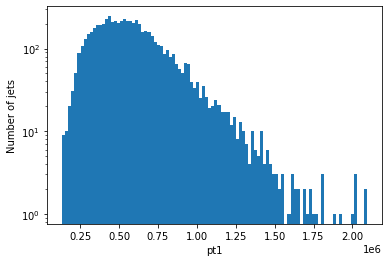

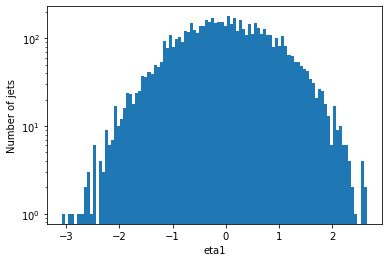

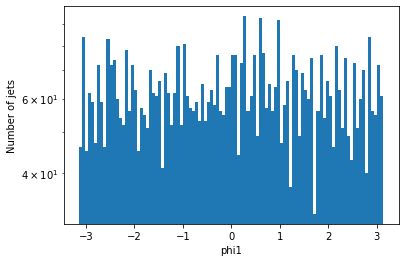

In [ ]:
plot_all(data_4d_df)

In [ ]:
#Standardizing the dataset for plotting
x = data_4d_df.values
x_scaled = StandardScaler().fit_transform(x)
standardized_4d = pd.DataFrame(x_scaled, columns=data_4d_df.keys())

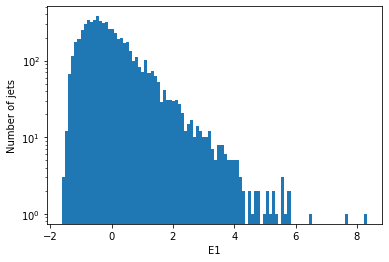

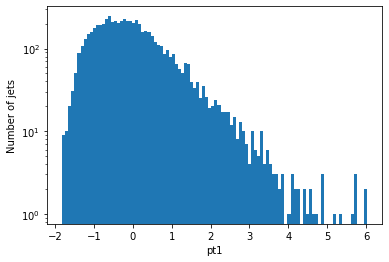

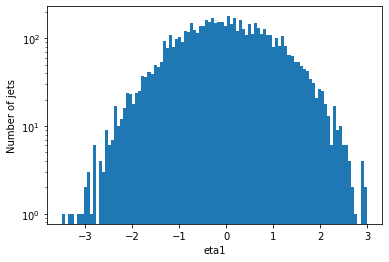

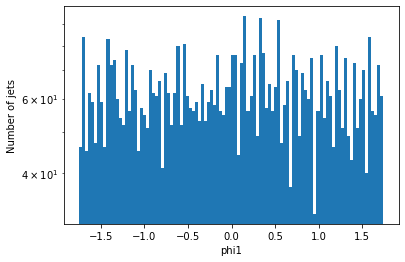

In [ ]:
plot_all(standardized_4d)

In [ ]:
data_4d_df_copy = data_4d_df.copy()

In [ ]:
#Applying the logarithmic transformation
data_4d_df_copy['E1'] = np.log10(data_4d_df['E1']) 
data_4d_df_copy['pt1'] = np.log10(data_4d_df['pt1']) 

In [ ]:
#Followed by standardization
x = data_4d_df_copy.values
x_scaled = StandardScaler().fit_transform(x)
data_4d_df_copy = pd.DataFrame(x_scaled, columns=data_4d_df_copy.keys())

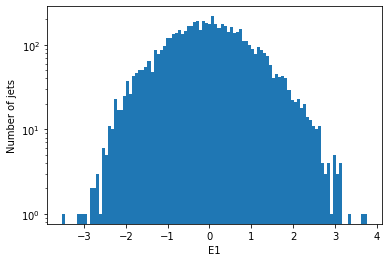

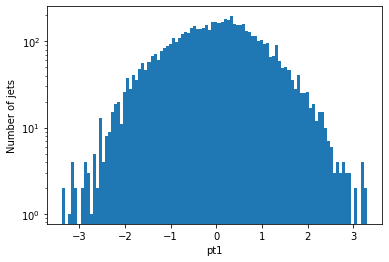

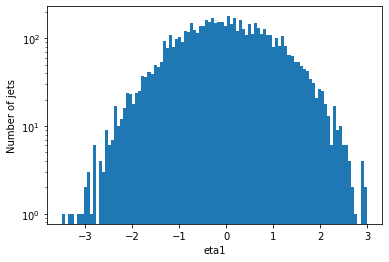

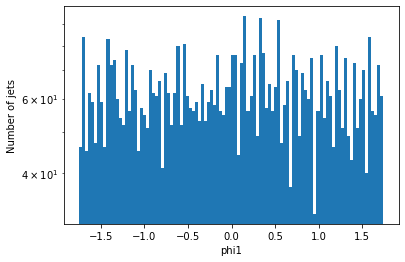

In [ ]:
plot_all(data_4d_df_copy)

In [ ]:
#Performing Normal Quantile transformation on the data
for col in data_4d_df.columns:
  transformer = QuantileTransformer(n_quantiles=100,random_state=0, output_distribution="normal")
  vec_len = len(data_4d_df[col].values)
  vec_len_test = len(data_4d_df[col].values)
  raw_vec = data_4d_df[col].values.reshape(vec_len, 1)
  transformer.fit(raw_vec)

  data_4d_df[col] = transformer.transform(raw_vec).reshape(1, vec_len)[0]

In [ ]:
#Followed by standardization 
x = data_4d_df.values
x_scaled = StandardScaler().fit_transform(x)
data_4d_df = pd.DataFrame(x_scaled, columns=data_4d_df.keys())

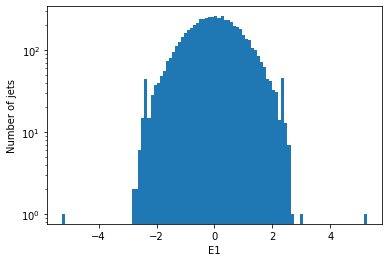

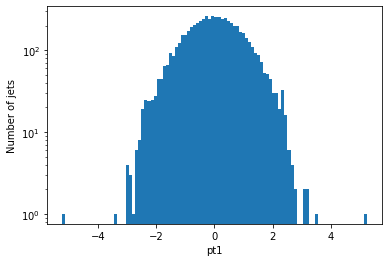

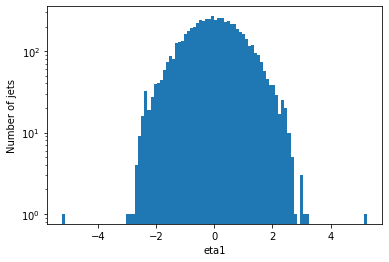

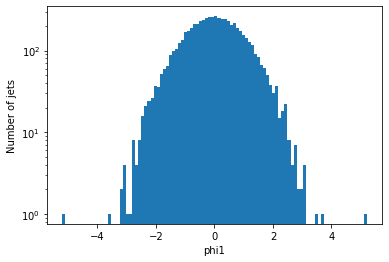

In [ ]:
plot_all(data_4d_df)

In [ ]:
data_4d_df.to_csv('Rank Gauss.csv')
data_4d_df_copy.to_csv('Standard.csv')